<a href="https://colab.research.google.com/github/Wiradhika6051/Feminicare/blob/ML/chatbot_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chatbot

### Input library

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
import re
import json
import nltk
from nltk.stem import WordNetLemmatizer
import pandas as pd

### load dataset dan preparation

In [4]:
import json
import pandas as pd
import re

# Read stop words from file
stop_words = set()
with open('stopword_id.txt', 'r', encoding='utf-8') as file:
    for line in file:
        stop_words.add(line.strip())

with open('dataset3.json') as f:
    data = json.load(f)

tags = []
inputs = []
responses = {}

# Function to remove stopwords
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

for intent in data['intents']:
    responses[intent['tag']] = intent['responses']
    for line in intent['patterns']:
        # Preprocess text
        line = re.sub('[.,’"\'-?:!;]', '', line)

        # Remove stopwords
        line = remove_stopwords(line)

        inputs.append(line)
        tags.append(intent['tag'])

# Create a DataFrame
data_df = pd.DataFrame({"inputs": inputs, "tags": tags})


### print dataset setelah preparation

In [5]:
print(data_df)

                                                inputs  \
0                                                hallo   
1                                                  hai   
2                                                 halo   
3                                                  hei   
4                                                   hi   
..                                                 ...   
716  Cara mencari dokter spesialis kesehatan menstr...   
717          Pemilihan dokter cocok masalah menstruasi   
718  siklus menstruasi berubah seiring pertambahan ...   
719  Perubahan dalam siklus menstruasi seiring bert...   
720  siklus menstruasi berubah saat memasuki usia t...   

                                        tags  
0                                      salam  
1                                      salam  
2                                      salam  
3                                      salam  
4                                      salam  
..                   

In [4]:
data_df.to_csv('output.csv', index=False)

print("CSV file created successfully.")

CSV file created successfully.


### preprocessing

In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Tokenizer
tokenizer = Tokenizer(num_words=2000, oov_token='<OOV>')
tokenizer.fit_on_texts(data_df['inputs'])

# Encode the outputs
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(data_df['tags'])

# Padding sequences
sequences = tokenizer.texts_to_sequences(data_df['inputs'])
max_len = max(len(sequence) for sequence in sequences)
x_train = pad_sequences(sequences, maxlen=max_len, truncating='post')

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


### inisialisasi layer

In [50]:
model = Sequential([
    tf.keras.layers.Embedding(len(tokenizer.word_index)+1, 64, input_length=max_len),
    tf.keras.layers.LSTM(436, return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax'),
])


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'precision'])



In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GlobalMaxPooling1D, Dropout, Dense

model = Sequential([
    Embedding(len(tokenizer.word_index)+1, 64, input_length=max_len),
    LSTM(436, return_sequences=True),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax'),
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### training model

In [64]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Tentukan callback ModelCheckpoint
checkpoint = ModelCheckpoint('best_model.h5',
                             monitor='val_accuracy',  # Gunakan metrik yang relevan, misalnya 'val_loss' atau 'val_accuracy'
                             save_best_only=True,     # Hanya simpan model terbaik
                             mode='max',              # Mode 'max' untuk akurasi, 'min' untuk loss
                             verbose=1)

# Latih model dengan menggunakan callback ModelCheckpoint
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint])

Epoch 1/100
36/36 [==============================] - ETA: 0s - loss: 5.1503 - accuracy: 0.0017
Epoch 1: val_loss improved from inf to 5.15535, saving model to best_model.h5
36/36 [==============================] - 6s 82ms/step - loss: 5.1503 - accuracy: 0.0017 - val_loss: 5.1553 - val_accuracy: 0.0207
Epoch 2/100
36/36 [==============================] - ETA: 0s - loss: 5.1336 - accuracy: 0.0156
Epoch 2: val_loss did not improve from 5.15535
36/36 [==============================] - 2s 55ms/step - loss: 5.1336 - accuracy: 0.0156 - val_loss: 5.1762 - val_accuracy: 0.0276
Epoch 3/100
36/36 [==============================] - ETA: 0s - loss: 5.0956 - accuracy: 0.0174
Epoch 3: val_loss did not improve from 5.15535
36/36 [==============================] - 2s 55ms/step - loss: 5.0956 - accuracy: 0.0174 - val_loss: 5.1984 - val_accuracy: 0.0207
Epoch 4/100
36/36 [==============================] - ETA: 0s - loss: 5.0378 - accuracy: 0.0208
Epoch 4: val_loss did not improve from 5.15535
36/36 [====

KeyboardInterrupt: ignored

### plot akurasi

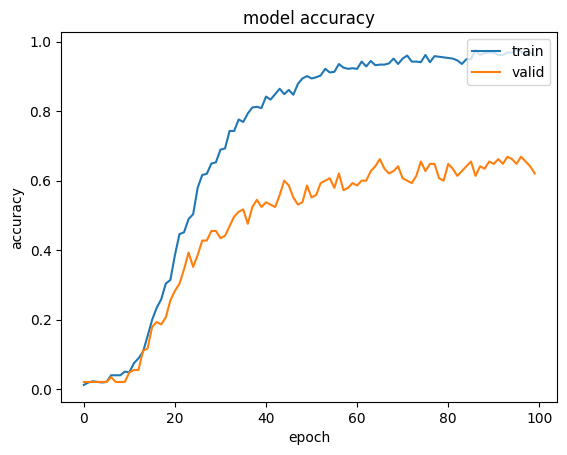

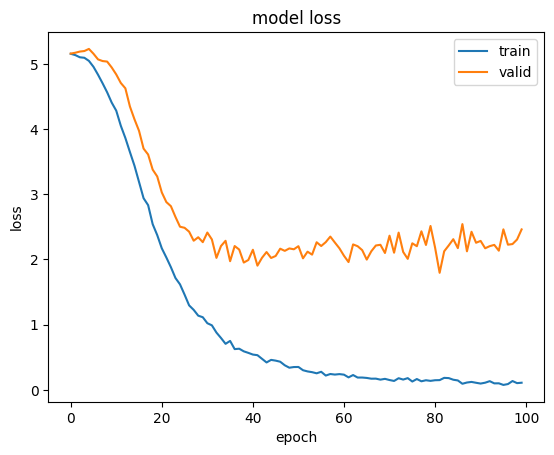

In [60]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [58]:
from tensorflow.keras.models import load_model

# Menyimpan model
# model.save('chatbot-new-.h5')

# Memuat model dari file H5
loaded_model = load_model('best_model_66.h5')


In [48]:
import re
import string

# Load stopwords from file
stop_words = set()
with open('stopword_id.txt', 'r', encoding='utf-8') as file:
    for line in file:
        stop_words.add(line.strip())


# Normalization rule for replacing "haid" with "menstruasi"
normalization_rules = {'haid': 'menstruasi'}

def preprocess_input(user_input):
    # Convert to lowercase
    user_input = user_input.lower()

    # Normalize using rules
    for key, value in normalization_rules.items():
        user_input = user_input.replace(key, value)

    # Remove characters not in [a-zA-Z0-9\s]
    user_input = re.sub(r'[.,’"\'-?:!;]', '', user_input)

    # Remove punctuation
    user_input = user_input.translate(str.maketrans("", "", string.punctuation))

    # Remove stopwords
    words = user_input.split()
    words = [word for word in words if word not in stop_words]

    # Join the words
    preprocessed_text = ' '.join(words)

    # Remove extra whitespaces
    preprocessed_text = re.sub(' +', ' ', preprocessed_text)

    return preprocessed_text

### check output

In [22]:
import random


while True:
    user_input = input('You: ')
    preprocessed_text = preprocess_input(user_input)
    # preprocessed_text = user_input
    print(preprocessed_text)
    if preprocessed_text.lower() == 'goodbye':
        print("Chatbot: Goodbye!")
        break
    try:
        input_seq = tokenizer.texts_to_sequences([preprocessed_text])
        input_seq = pad_sequences(input_seq, maxlen=max_len)
        predicted_label_seq = model.predict(input_seq)
        predicted_label = label_encoder.inverse_transform([predicted_label_seq.argmax(axis=-1)])[0]
        print("tags:", predicted_label)

        # Pilih respons dari kategori tag
        responses_for_tag = responses.get(predicted_label, ["Chatbot: Maaf, saya tidak memahami maksud Anda."])
        response = random.choice(responses_for_tag)

        print("Chatbot:", response)
    except:
        print("Chatbot: Maaf, saya tidak memahami maksud Anda.")


You: aku menstruasi nih, bagaimana ngatasi nyerinya?
menstruasi nih ngatasi nyerinya
1/1 [==============================] - 1s 673ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


tags: siklus_menstruasi_normal
Chatbot: Siklus menstruasi normal biasanya terdiri dari beberapa fase, termasuk menstruasi (hari-hari menstruasi), fase folikuler, ovulasi, dan fase luteal. Siklus menstruasi normal berlangsung selama 28-35 hari, namun bisa berbeda-beda pada setiap wanita. Fase menstruasi dimulai dengan hari pertama menstruasi dan berlanjut hingga fase folikuler, di mana folikel ovarium mulai berkembang. Kemudian terjadi ovulasi, di mana sel telur dilepaskan dari ovarium, dan akhirnya fase luteal, di mana tubuh bersiap untuk kehamilan. Jika kehamilan tidak terjadi, siklus ini akan berlanjut dengan menstruasi berikutnya.
You: apa itu menstruasi?
menstruasi
1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


tags: pengertian_menstruasi
Chatbot: Menstruasi adalah proses alami yang terjadi pada wanita setiap bulan. Selama menstruasi, tubuh melepaskan lapisan rahim yang tidak diperlukan melalui vagina.
You: kamu siapa?
kamu siapa
1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


tags: tentang_aku
Chatbot: aku adalah teman bicara kamu untuk membahas permasalahan menstruasi. Jangan malu untuk bertanya dengan aku tentang permasalahan kamu
You: mengatasi nyeri menstruasi bagaimana?
mengatasi nyeri menstruasi
1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


tags: pengobatan_nyeri_menstruasi
Chatbot: Cara menangani nyeri menstruasi dapat meliputi penggunaan obat antiinflamasi nonsteroid (OAINS) seperti ibuprofen, perubahan gaya hidup seperti mengurangi konsumsi kafein dan alkohol, menggunakan panas pada daerah perut yang nyeri, dan berolahraga teratur. Dokter juga dapat meresepkan obat-obatan yang lebih kuat jika nyeri menstruasi sangat parah atau tidak merespons pengobatan OAINS. Selain itu, terapi hormon atau prosedur medis tertentu mungkin diperlukan jika nyeri menstruasi disebabkan oleh kondisi medis seperti endometriosis.
You: oke byee
oke byee
1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


tags: goodbye
Chatbot: Dahh, semoga harimu menyenangkan yaa!


KeyboardInterrupt: ignored

In [59]:
import random


while True:
    user_input = input('You: ')
    preprocessed_text = preprocess_input(user_input)
    # preprocessed_text = user_input
    print(preprocessed_text)
    if preprocessed_text.lower() == 'goodbye':
        print("Chatbot: Goodbye!")
        break
    try:
        input_seq = tokenizer.texts_to_sequences([preprocessed_text])
        input_seq = pad_sequences(input_seq, maxlen=max_len)
        predicted_label_seq = loaded_model.predict(input_seq)
        predicted_label = label_encoder.inverse_transform([predicted_label_seq.argmax(axis=-1)])[0]
        print("tags:", predicted_label)

        # Pilih respons dari kategori tag
        responses_for_tag = responses.get(predicted_label, ["Chatbot: Maaf, saya tidak memahami maksud Anda."])
        response = random.choice(responses_for_tag)

        print("Chatbot:", response)
    except:
        print("Chatbot: Maaf, saya tidak memahami maksud Anda.")


You: apa itu endomet?
endomet
1/1 [==============================] - 0s 416ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


tags: goodbye
Chatbot: Dadahh!
You: apa itu monopouse?
monopouse
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


tags: goodbye
Chatbot: Good bye!
You: apa iru nyeri haid?
iru nyeri menstruasi
1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


tags: pengertian_nyeri_menstruasi
Chatbot: Nyeri menstruasi, juga dikenal sebagai dismenore, adalah nyeri atau kram yang terjadi pada perut bagian bawah atau panggul selama menstruasi. Nyeri menstruasi dapat bervariasi dari rasa tidak nyaman hingga nyeri yang parah dan dapat memengaruhi kualitas hidup sebagian wanita. Nyeri ini biasanya terjadi sebelum atau selama awal menstruasi dan dapat berlangsung selama beberapa hari.
You: mengtasi nyeri menstruasi?
mengtasi nyeri menstruasi
1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


tags: pengertian_nyeri_menstruasi
Chatbot: Nyeri menstruasi, juga dikenal sebagai dismenore, adalah nyeri atau kram yang terjadi pada perut bagian bawah atau panggul selama menstruasi. Nyeri menstruasi dapat bervariasi dari rasa tidak nyaman hingga nyeri yang parah dan dapat memengaruhi kualitas hidup sebagian wanita. Nyeri ini biasanya terjadi sebelum atau selama awal menstruasi dan dapat berlangsung selama beberapa hari.
You: pcos?
pcos
1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


tags: pengertian_PCOS
Chatbot: PCOS (Polycystic Ovary Syndrome) adalah kondisi medis yang memengaruhi ovarium wanita. PCOS terjadi ketika ovarium menghasilkan jumlah hormon tertentu yang tidak seimbang, yang dapat menyebabkan pertumbuhan folikel ovarium yang tidak matang. Hal ini dapat mengganggu ovulasi dan menyebabkan gejala seperti gangguan menstruasi, pertumbuhan rambut berlebihan, dan masalah kesuburan.
You: perbedaan pcos
perbedaan pcos
1/1 [==============================] - 0s 34ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


tags: pengertian_PCOS
Chatbot: PCOS (Polycystic Ovary Syndrome) adalah kondisi medis yang memengaruhi ovarium wanita. PCOS terjadi ketika ovarium menghasilkan jumlah hormon tertentu yang tidak seimbang, yang dapat menyebabkan pertumbuhan folikel ovarium yang tidak matang. Hal ini dapat mengganggu ovulasi dan menyebabkan gejala seperti gangguan menstruasi, pertumbuhan rambut berlebihan, dan masalah kesuburan.
You: endometrosis?
endometrosis
1/1 [==============================] - 0s 26ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


tags: pengertian_endometriosis
Chatbot: Endometriosis adalah kondisi medis di mana jaringan yang biasanya tumbuh di dalam rahim (endometrium) mulai tumbuh di luar rahim. Ini bisa terjadi di ovarium, rahim, atau organ panggul lainnya. Kondisi ini seringkali menyebabkan nyeri panggul yang intens dan dapat memengaruhi kemampuan seseorang untuk hamil.
You: mengtasi endometrosis?
mengtasi endometrosis
1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


tags: pengertian_endometriosis
Chatbot: Endometriosis adalah kondisi medis di mana jaringan yang biasanya tumbuh di dalam rahim (endometrium) mulai tumbuh di luar rahim. Ini bisa terjadi di ovarium, rahim, atau organ panggul lainnya. Kondisi ini seringkali menyebabkan nyeri panggul yang intens dan dapat memengaruhi kemampuan seseorang untuk hamil.
You: bagaimana cara mentasi monoupose?
cara mentasi monoupose
1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


tags: goodbye
Chatbot: Sampai jumpa lagi!
You: monoupose?
monoupose
1/1 [==============================] - 0s 38ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


tags: goodbye
Chatbot: See u! Senang bisa membantu
You: hubungi ke dokter?
hubungi ke dokter
1/1 [==============================] - 0s 25ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


tags: terimakasih
Chatbot: Sama-sama yaa


KeyboardInterrupt: ignored